In [48]:
strategy_name ='培宏量化1号'
off_start = ('close_mtx', 0)

In [49]:
import sys
sys.path.append("C:\Program Files\Tinysoft\Analyse.NET")
sys.path.append(r"C:\Users\xudong\Documents\github\coresearch\funcs")
import rschLib
import pymongo
import numpy as np
import matplotlib.pyplot as plt
import pickle
import time
import datetime
import copy
import pandas as pd
from operator import itemgetter
import TSLPy3 as tsl
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull, convex_hull_plot_2d
import talib
import matplotlib.dates as mdates

np.set_printoptions(formatter={'float_kind': "{:.6f}".format})
client = pymongo.MongoClient('localhost', 27017)
db = rschLib.db_quanLiang()
dbt = rschLib.db_tinySoftData()

In [50]:
#参数：
startDate = 20180101

In [51]:
def dtes2Label(dtes):
    return np.array([datetime.datetime.strptime(str(d), '%Y%m%d').date() for d in dtes])


In [52]:
plt.rcParams['font.sans-serif'] = [u'SimHei']
plt.rcParams['axes.unicode_minus'] = False
default_dpi = plt.rcParamsDefault['figure.dpi']
plt.rcParams['figure.dpi'] = default_dpi*1

In [53]:
with open(r"d:\pkl\dailyBarMtx.pkl", 'rb+') as f:
    z = pickle.load(f)
dtes = z['dtes']
dtes = np.array(dtes).astype(np.int)
tkrs = list(z['tkrs'])
open_mtx = z['open_mtx']
high_mtx = z['high_mtx']
low_mtx = z['low_mtx']
close_mtx = z['close_mtx']

k = close_mtx==0
close_mtx = rschLib.zero2pre(close_mtx)
open_mtx[k]=close_mtx[k]
high_mtx[k]=close_mtx[k]
low_mtx[k]=close_mtx[k]

name = z['name']
belong = z['belong']
shenwan1 = z['shenwan1']
shenwan2 = z['shenwan2']
shenwan3 = z['shenwan3']
vol_mtx = z['vol_mtx']
amount_mtx = z['amount_mtx']

In [54]:
v = pd.DataFrame(vol_mtx)
q = np.array(v.rolling(5,axis=1).mean())
q = np.array(q)
lb = np.zeros(vol_mtx.shape)+1
lb[:,1:]=vol_mtx[:, 1:]/q[:,:-1]
lb[np.isfinite(lb)==False]=0

C:\ProgramData\Anaconda3\envs\research\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """
C:\ProgramData\Anaconda3\envs\research\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


In [55]:
idxTiaoKongGaoKai = np.hstack((np.zeros((open_mtx.shape[0],1))==1,((open_mtx[:,1:] / high_mtx[:,:-1]) - 1 > 0.01)))

C:\ProgramData\Anaconda3\envs\research\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\envs\research\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


In [56]:
name = list(name)
tkrs = list(tkrs)

In [57]:
Ns = 10 # 取每天量比的前多少名
Wl = 500 # 当天收盘价格位于Wl日内的高低点相对位置
Ws = 20 #  当天收盘价格位于Ws日内的高低点相对位置
priceLocL = np.array(np.zeros(close_mtx.shape)) #较长时间内的价格位置
priceLocS = np.array(np.zeros(close_mtx.shape)) #较短时间内的价格位置
preHighL = np.array(np.zeros(close_mtx.shape))
preLowL = np.array(np.zeros(close_mtx.shape))
preHighS = np.array(np.zeros(close_mtx.shape))
preLowS = np.array(np.zeros(close_mtx.shape))
idxZhangtingAtClose = np.array(np.zeros(close_mtx.shape), dtype='bool') # 收盘没有涨停
idxZhangtingAtOpen = np.array(np.zeros(close_mtx.shape), dtype='bool') # 开盘没有涨停
idxZhangtingAtClose[:, 1:] = (close_mtx[:, 1:] / close_mtx[:, :-1] - 1) > 0.095
idxZhangtingAtOpen[:, 1:] = (open_mtx[:, 1:] / close_mtx[:, :-1] - 1) > 0.095

for k in range(1,close_mtx.shape[1]):    
    #长期价格位置
    q = np.max((0, k-Wl))
    preHighL[:, k] = np.max(high_mtx[:, q:k], axis=1)
    preLowL[:, k] = np.min(low_mtx[:, q:k], axis=1)
    priceLocL[:, k] = (close_mtx[:,k-1]-preLowL[:,k])/(preHighL[:,k]-preLowL[:,k])
    #短期价格位置
    q = np.max((0, k-Ws))
    preHighS[:, k] = np.max(high_mtx[:, q:k], axis=1)
    preLowS[:, k] = np.min(low_mtx[:, q:k], axis=1)
    priceLocS[:, k] = (close_mtx[:,k-1]-preLowS[:,k])/(preHighS[:,k]-preLowS[:,k])
    

C:\ProgramData\Anaconda3\envs\research\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in true_divide
  if sys.path[0] == '':
C:\ProgramData\Anaconda3\envs\research\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':
C:\ProgramData\Anaconda3\envs\research\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]
C:\ProgramData\Anaconda3\envs\research\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]
C:\ProgramData\Anaconda3\envs\research\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide
C:\ProgramData\Anaconda3\envs\research\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in true_divide


In [58]:
q = list(db.tkrsInfo.find({},{
    'ticker':1,
    'circulateMarketValue20150101':1,
    'circulateMarketValue20160101':1,
    'circulateMarketValue20170101':1,
    'circulateMarketValue20180101':1,
    'circulateMarketValue20190101':1,
    'circulateMarketValue20200101':1,
    'circulateMarketValue':1
}))
cmv2016 = np.zeros(len(tkrs))
cmv2017 = np.zeros(len(tkrs))
cmv2018 = np.zeros(len(tkrs))
cmv2019 = np.zeros(len(tkrs))
cmv2020 = np.zeros(len(tkrs))
cmv = np.zeros(len(tkrs))
for x in q:
    if (x['ticker'] in list(tkrs))==False:
        continue
    if 'circulateMarketValue' in x:
        cmv[list(tkrs).index(x['ticker'])]=x['circulateMarketValue']
    if 'circulateMarketValue20160101' in x:
        cmv2016[list(tkrs).index(x['ticker'])]=x['circulateMarketValue20160101']
    if 'circulateMarketValue20170101' in x:
        cmv2017[list(tkrs).index(x['ticker'])]=x['circulateMarketValue20170101']
        cmv[list(tkrs).index(x['ticker'])]=x['circulateMarketValue']
    if 'circulateMarketValue20180101' in x:
        cmv2018[list(tkrs).index(x['ticker'])]=x['circulateMarketValue20180101']
        cmv[list(tkrs).index(x['ticker'])]=x['circulateMarketValue']
    if 'circulateMarketValue20190101' in x:
        cmv2019[list(tkrs).index(x['ticker'])]=x['circulateMarketValue20190101']
        cmv[list(tkrs).index(x['ticker'])]=x['circulateMarketValue']
    if 'circulateMarketValue20200101' in x:
        cmv2020[list(tkrs).index(x['ticker'])]=x['circulateMarketValue20200101']


In [59]:
cmv_threshold = 100e4
wants = list(np.array(tkrs)[cmv2020>cmv_threshold])
off = 1
print('选股池大小：', len(wants))
q = [list(tkrs).index(x) for x in wants]
idxT = [x in q for x in range(len(tkrs))]

选股池大小： 775


In [60]:
idxNST = [('ST' in x)==False for x in name]

In [61]:
startDate = 20180101

In [62]:
tkrs.index('SH600420')
idxT[544]
print(priceLocL[544,-1],preLowL[544,-1], preHighL[544,-1],close_mtx[544,-1])

0.603911104030588 7.987230769230769 11.85 10.38


In [63]:
priceLocThrsMin = 0.1 # 价格大于近期的priceLocthrsMin位置
priceLocThrsMax = 0.5 # 价格小于近期的priceLocthrsMax位置
lbMax = 30 # 量比允许最大值
db.strategyBackTestTrades.remove({'strategy_name':strategy_name})
k0  = np.nonzero(dtes>startDate)[0][1]
pnl1 = []
pnl2 = []
pnl3 = []
pnl4 = []
pnl5 = []
tradesCount = []
ll = list(tkrs)
nn = list(name)
dtesUsed = []
f = open("output.txt", "w")
sp = close_mtx.shape[1]-1
for k in range(k0, close_mtx.shape[1]):
    # 跳空高开， 价格位置
    #idxQ = (idxTiaoKongGaoKai[:,k]==True) & idxT & (priceLocL[:, k]>0.1) & (priceLocL[:, k]<0.9)
    # 跳空高开
    idxQ = (idxTiaoKongGaoKai[:,k]==True) & idxT & (priceLocL[:, k]<0.5)
    #idxQ = (idxTiaoKongGaoKai[:,k]==True) & idxT & (priceLocL[:, k]<0.2)
    #选择高量比
    m = np.nonzero(idxQ==True)[0]
    lbm = lb[m,k]
    lidx = m[np.argsort(lbm)[::-1]] #得到哪些股票在idxQ中存在且量比排名前十
    if (len(lidx)>10):
        lidx=lidx[:10]
    idxQ2 = np.zeros(idxQ.shape)==1
    idxQ2[lidx]=True
    
    t  = np.nonzero(idxQ2)[0]
    m = np.array(tkrs)[t]
    #qt = list(dbt.minuteBarStock.find({'ticker':{'$in': list(m)},'dateAsInt':int(dtes[k]),"offSetFromMidNight" :  5370e4, 'lb':{'$lte':50}}, {'ticker':1, 'close':1, 'open':1, 'sectional_open':1, 'lb':1, 'sale1':1, 'dateTime':1, 'StockName':1}).sort('lb',-1).limit(10))
    qt = list(dbt.minuteBarStock.find({'ticker':{'$in': list(m)},'dateAsInt':int(dtes[k]),"offSetFromMidNight" :  5370e4, 'lb':{'$lte':50}}, {'ticker':1, 'close':1, 'open':1, 'sectional_open':1, 'lb':1, 'sale1':1, 'dateTime':1, 'StockName':1}).sort('lb',-1))
    q = []
    qs = []
    for x in qt:
        if (x['sale1']==0):
            print('忽略涨停股：',x['StockName'],dtes[k], x['dateTime'])
            continue
        if (x['close']/x['sectional_open']-1 < 0):
            continue
        if (k<sp) & (idxZhangtingAtOpen[ll.index(x['ticker']), np.min((k+1, sp))]==True):
            print(x['ticker'], dtes[k],' 第二日开盘涨停不买')
            continue
        if x['ticker'] in qs:
            continue
        q.append(x)
        qs.append(x['ticker'])
    if (len(q)==0):
        continue
    mk = [x['ticker'] for x in q]
    q0 = list(dbt.minuteBarStock.find({'ticker':{'$in': mk},'dateAsInt':int(dtes[k]),"offSetFromMidNight" : 34260000}, {'ticker':1, 'close':1, 'lb':1}))
    qc = list(dbt.minuteBarStock.find({'ticker':{'$in': mk},'dateAsInt':int(dtes[k]),"offSetFromMidNight" : 53940000}, {'ticker':1, 'close':1, 'lb':1}))
    m0 = [x['ticker'] for x in q0]
    mc = [x['ticker'] for x in qc]
    index0 = [m0.index(x) for x in mk]
    indexc = [mc.index(x) for x in mk]
    close0930 = np.array([x['close'] for x in q0])[index0]
    close1500 = np.array([x['close'] for x in qc])[indexc]
    close0935  = np.array([x['close'] for x in q])
    sn = [x['ticker'] for x in q]
    idx = [ll.index(x['ticker']) for x in q]
    lbm = np.array([x['lb'] for x in q])
    pLocL = priceLocL[idx, k]
    pLocS = priceLocS[idx, k]
    close_today = close_mtx[idx, k]  # 今天收盘
    open_today = open_mtx[idx, k]    # 今天开盘
    close_tomorrow = close_mtx[idx, np.min((k+1,sp))] # 明天收盘
    if k+1<sp: # 明天开盘
        open_tomorrow = open_mtx[idx, k+1]
    else:
        open_tomorrow = close_mtx[idx, sp]
    if k+2<sp:
        open_p3 = open_mtx[idx, k+2]   # 后天开盘
    else:
        open_p3 = close_mtx[idx, sp]   # 后天开盘
    close_p3 = close_mtx[idx, np.min((k+2,sp))]  # 后天收盘
    close_yesterday = close_mtx[idx, k-1]
    close_yesterday2 = close_mtx[idx, k-2]
    isZhangTing = idxZhangtingAtClose[idx, k]
    
    # r1: 第一天入场到收盘
    # r2: 第一天收盘到第二天开盘
    # r3: 第二天开盘到第二天收盘
    # r4: 第二天收盘到第三天开盘
    # r5: 第三天开盘到第三天收盘
    r1 = np.mean(close1500/close0935 - 1)
    r2 = np.mean(open_tomorrow/close_today  - 1)
    r3 = np.mean(close_tomorrow/open_tomorrow - 1)
    r4 = np.mean(open_p3/close_tomorrow - 1)
    r5 = np.mean(close_p3/open_p3 - 1)
    pnl1.append(r1)
    pnl2.append(r2)
    pnl3.append(r3)
    pnl4.append(r4)
    pnl5.append(r5)
    tradesCount.append(len(close1500))
    dtesUsed.append(dtes[k])
    for (iq,t) in enumerate(sn):
        s = nn[ll.index(t)] + ','+str(dtes[k])+',量比,'+str(np.round(lbm[iq]))+\
        ',价格位置（长期),'+str(np.round(1e4*pLocL[iq])/1e2)+\
        ',价格位置（短期),'+str(np.round(1e4*pLocS[iq])/1e2)+\
        ',cmv2019,'+str(cmv2019[ll.index(t)])+\
        ',cmv2020,'+str(cmv2020[ll.index(t)])+\
        ',cmv2018,'+str(cmv2018[ll.index(t)])+\
        ',第一天涨幅,'+str(close_today[iq]/close_yesterday[iq]-1)+\
        ',开盘涨幅（9:30-9:35）,'+str(close0935[iq]/close0930[iq]-1)+\
        ',入场后到收盘,'+str(close_today[iq]/close0935[iq]-1)+\
        ',第二天开盘涨幅,'+str(open_tomorrow[iq]/close_today[iq]-1)+\
        ',第二天日内涨幅,'+str(close_tomorrow[iq]/open_tomorrow[iq]-1)+\
        ',第二天收盘至第三天开盘,'+str(open_p3[iq]/close_tomorrow[iq]-1)+\
        ',第三天开盘至收盘,'+str(close_p3[iq]/open_p3[iq]-1)+\
        ',昨日涨幅,'+str(close_yesterday[iq]/close_yesterday2[iq]-1)+\
        ',跳空高开幅度,'+str(open_today[iq]/close_yesterday[iq]-1)+\
        ',买入价,'+str(open_tomorrow[iq])+\
        ',卖出价,'+str(close_p3[iq])+\
        ',利润,'+str(close_p3[iq]/open_tomorrow[iq]-1)+\
        ',是否涨停,'+str(isZhangTing[iq])
        f.write(s+'\n')
        print(nn[ll.index(t)] + ','+str(dtes[k])+',量比,'+str(np.round(lbm[iq]))+',进场价格:'+str(open_tomorrow[iq])+',出场价格:'+str(close_p3[iq])+',利润,'+str(close_p3[iq]/open_tomorrow[iq]-1))
        db.strategyBackTestTrades.insert_one({
            'ticker':t,
            'name':nn[ll.index(t)], 
            'dateIn':int(dtes[k]), 
            'strategy_name':strategy_name})
f.close()

忽略涨停股： 首创股份 20180103 2018-01-03 06:55:00
忽略涨停股： 金隅集团 20180103 2018-01-03 06:55:00
忽略涨停股： 重庆钢铁 20180103 2018-01-03 06:55:00
中远海控,20180103,量比,2.0,进场价格:6.99,出场价格:7.22,利润,0.03290414878397696


C:\ProgramData\Anaconda3\envs\research\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: remove is deprecated. Use delete_one or delete_many instead.
  after removing the cwd from sys.path.


忽略涨停股： 重庆钢铁 20180104 2018-01-04 06:55:00
常熟银行,20180104,量比,7.0,进场价格:7.38841067229247,出场价格:7.258789432427689,利润,-0.01754385964912286
中国宝安,20180104,量比,3.0,进场价格:6.318245449725515,出场价格:6.210876572802074,利润,-0.016993464052287632
忽略涨停股： 重庆钢铁 20180105 2018-01-05 06:55:00
易见股份,20180105,量比,5.0,进场价格:11.046156716417908,出场价格:13.529850746268654,利润,0.22484689413823267
燕京啤酒,20180105,量比,3.0,进场价格:7.136563958708581,出场价格:7.106828275547295,利润,-0.004166666666666652
忽略涨停股： 重庆钢铁 20180108 2018-01-08 06:55:00
温氏股份,20180108,量比,4.0,进场价格:20.186762235363588,出场价格:20.042136110751255,利润,-0.007164404223227727
忽略涨停股： 易见股份 20180109 2018-01-09 06:55:00
忽略涨停股： 蓝光发展 20180109 2018-01-09 06:55:00
海油工程,20180110,量比,2.0,进场价格:6.537309147463024,出场价格:6.48881278880232,利润,-0.007418397626112627
广电运通,20180111,量比,5.0,进场价格:8.067596320064409,出场价格:7.36853059678014,利润,-0.08665105386416849
万达信息,20180111,量比,4.0,进场价格:13.965946089646803,出场价格:13.048838994537949,利润,-0.06566738044254095
万通发展,20180112,量比,4.0,进场价格:4.9734484685502744,出场价格:4.827456830

北大荒  ,20180323,量比,7.0,进场价格:11.047072656048309,出场价格:10.505729394663883,利润,-0.04900332225913617
梅花生物,20180323,量比,7.0,进场价格:4.11051131785609,出场价格:4.2651642189239425,利润,0.03762376237623766
忽略涨停股： 四维图新 20180327 2018-03-27 06:55:00
忽略涨停股： 恒生电子 20180327 2018-03-27 06:55:00
华兰生物,20180327,量比,3.0,进场价格:14.862208049841922,出场价格:14.697516019739576,利润,-0.011081262592343877
五矿稀土,20180327,量比,3.0,进场价格:11.363549160671463,出场价格:11.742334132693843,利润,0.033333333333333215
九阳股份,20180327,量比,2.0,进场价格:15.05778380054256,出场价格:15.783246944869523,利润,0.04817861339600471
营口港  ,20180327,量比,2.0,进场价格:2.880982709911937,出场价格:2.909601743454109,利润,0.009933774834437026
航发动力,20180327,量比,2.0,进场价格:26.37062643867384,出场价格:26.90217322019246,利润,0.02015677491601342
华宇软件,20180327,量比,2.0,进场价格:18.841392224760824,出场价格:19.218021843141102,利润,0.019989479221462325
国瓷材料,20180327,量比,2.0,进场价格:12.563225384140683,出场价格:13.005778539102527,利润,0.035226077812828605
太极股份,20180328,量比,6.0,进场价格:18.15708869660914,出场价格:19.563475913571928,利润,0.077456647398843

首开股份,20180613,量比,3.0,进场价格:7.083930644163995,出场价格:7.292281545462935,利润,0.02941176470588225
亿帆医药,20180613,量比,2.0,进场价格:17.336250828259896,出场价格:17.095603259849845,利润,-0.013881177123820199
新 和 成,20180621,量比,3.0,进场价格:16.608207385121194,出场价格:16.66511729049568,利润,0.0034266133637921303
海格通信,20180621,量比,3.0,进场价格:7.725650852385357,出场价格:7.735430157261794,利润,0.0012658227848101333
山煤国际,20180621,量比,2.0,进场价格:4.439126365054602,出场价格:4.468985959438378,利润,0.0067264573991032695
上峰水泥,20180621,量比,1.0,进场价格:8.938829669197483,出场价格:8.994989855600817,利润,0.006282722513088812
新奥股份,20180625,量比,2.0,进场价格:10.384228448085988,出场价格:10.669770935201093,利润,0.027497708524289566
东方通,20180625,量比,1.0,进场价格:13.727128523650261,出场价格:14.575097945532727,利润,0.06177325581395343
忽略涨停股： 中国软件 20180627 2018-06-27 06:55:00
忽略涨停股： 神州信息 20180627 2018-06-27 06:55:00
太极股份,20180627,量比,2.0,进场价格:19.3695967531331,出场价格:20.512720495940954,利润,0.05901639344262288
中国石油,20180627,量比,2.0,进场价格:7.0781477441692555,出场价格:7.1617479143759795,利润,0.01181102362204722

陕西煤业,20180907,量比,10.0,进场价格:7.394996738045898,出场价格:7.256167012050042,利润,-0.018773466833541974
中国神华,20180907,量比,3.0,进场价格:16.51605164116081,出场价格:16.074445982306244,利润,-0.0267379679144385
忽略涨停股： 许继电气 20180910 2018-09-10 06:55:00
许继电气,20180911,量比,11.0,进场价格:8.26727636192072,出场价格:8.980143305703105,利润,0.0862275449101797
忽略涨停股： 环旭电子 20180913 2018-09-13 06:55:00
中兴通讯,20180913,量比,2.0,进场价格:18.44249802787273,出场价格:18.2435498290823,利润,-0.010787486515641875
中际旭创,20180913,量比,1.0,进场价格:32.13316557757763,出场价格:30.86718428656195,利润,-0.03939796370075266
云南铜业,20180913,量比,1.0,进场价格:9.1,出场价格:8.88,利润,-0.02417582417582409
中国太保,20180913,量比,1.0,进场价格:30.10070295240008,出场价格:29.960482286472747,利润,-0.004658385093167849
长安汽车,20180914,量比,2.0,进场价格:6.6929044585987265,出场价格:6.712853503184713,利润,0.0029806259314455463
比亚迪,20180914,量比,2.0,进场价格:43.81334461180979,出场价格:44.888763070463305,利润,0.024545454545454648
申通快递,20180919,量比,5.0,进场价格:16.843079307216847,出场价格:18.041285643126432,利润,0.07113938692886057
攀钢钒钛,20180919,量比,4.0,进场价格:3.6,

忽略涨停股： 新华文轩 20181205 2018-12-05 06:55:00
大悦城,20181205,量比,5.0,进场价格:5.180201858689228,出场价格:5.122856450659458,利润,-0.011070110701106972
沙钢股份,20181205,量比,2.0,进场价格:9.269571426201392,出场价格:9.694962644266132,利润,0.04589114194236954
延安必康,20181205,量比,1.0,进场价格:24.9,出场价格:24.52,利润,-0.015261044176706817
延安必康,20181206,量比,0.0,进场价格:24.3,出场价格:23.95,利润,-0.01440329218107006
银泰黄金,20181210,量比,2.0,进场价格:6.211412754832388,出场价格:6.551859315220293,利润,0.05480984340044737
海油工程,20181210,量比,1.0,进场价格:5.332553912066194,出场价格:5.34233841465714,利润,0.0018348623853210455
吉比特  ,20181211,量比,2.0,进场价格:146.14850733648484,出场价格:144.4396649703412,利润,-0.011692506459948238
万  科Ａ,20181212,量比,1.0,进场价格:24.74198822040473,出场价格:24.52877513345482,利润,-0.008617459722742637
海康威视,20181212,量比,1.0,进场价格:26.138604811812147,出场价格:26.614371189893912,利润,0.018201674554058966
千方科技,20181212,量比,1.0,进场价格:12.003084631138032,出场价格:12.082641115851457,利润,0.006628003314001596
中国太保,20181212,量比,1.0,进场价格:28.698496293126784,出场价格:28.418054961272123,利润,-0.0097719869706840

忽略涨停股： 康恩贝   20190221 2019-02-21 06:55:00
忽略涨停股： 安信信托 20190222 2019-02-22 06:55:00
忽略涨停股： 金证股份 20190222 2019-02-22 06:55:00
忽略涨停股： 大智慧   20190222 2019-02-22 06:55:00
忽略涨停股： 小商品城 20190225 2019-02-25 06:55:00
忽略涨停股： 君正集团 20190225 2019-02-25 06:55:00
忽略涨停股： 常熟银行 20190225 2019-02-25 06:55:00
忽略涨停股： 中山公用 20190225 2019-02-25 06:55:00
忽略涨停股： 浙数文化 20190225 2019-02-25 06:55:00
忽略涨停股： 吉林敖东 20190225 2019-02-25 06:55:00
忽略涨停股： 北京城建 20190225 2019-02-25 06:55:00
杭州银行,20190225,量比,5.0,进场价格:8.370042575343884,出场价格:8.473376434298746,利润,0.012345679012345512
贵阳银行,20190225,量比,5.0,进场价格:8.686239185357051,出场价格:8.706146532611498,利润,0.0022918258212376585
物产中大,20190225,量比,4.0,进场价格:5.087867241737205,出场价格:4.961348340521715,利润,-0.0248667850799289
忽略涨停股： 泛海控股 20190226 2019-02-26 06:55:00
忽略涨停股： 浙数文化 20190226 2019-02-26 06:55:00
北方稀土,20190226,量比,5.0,进场价格:10.91032608695652,出场价格:10.621376811594201,利润,-0.026484018264840148
太平洋  ,20190226,量比,3.0,进场价格:3.83,出场价格:3.91,利润,0.02088772845953013
天津港  ,20190226,量比,3.0,进场价格:5.58535

中粮糖业,20190508,量比,1.0,进场价格:8.611312883435582,出场价格:8.749251533742331,利润,0.016018306636155666
和邦生物,20190510,量比,3.0,进场价格:2.01,出场价格:1.89,利润,-0.05970149253731338
易见股份,20190513,量比,2.0,进场价格:13.19,出场价格:13.6,利润,0.031084154662623265
西藏珠峰,20190513,量比,2.0,进场价格:19.073194283507146,出场价格:22.053603707995364,利润,0.15626168224299053
上海医药,20190514,量比,2.0,进场价格:18.051090774510463,出场价格:18.203823430455554,利润,0.008461131676361644
忽略涨停股： 阳光电源 20190515 2019-05-15 06:55:00
三钢闽光,20190515,量比,2.0,进场价格:10.231384684532841,出场价格:10.27706050901736,利润,0.004464285714285365
卫星石化,20190515,量比,1.0,进场价格:15.732086956521737,出场价格:14.527999999999999,利润,-0.07653701380175659
山煤国际,20190515,量比,1.0,进场价格:4.976599063962558,出场价格:4.8472074882995315,利润,-0.026000000000000023
海南橡胶,20190516,量比,2.0,进场价格:5.27992380952381,出场价格:5.259961904761904,利润,-0.003780718336484079
常山北明,20190516,量比,1.0,进场价格:6.07,出场价格:5.89,利润,-0.029654036243822124
忽略涨停股： 紫光国微 20190517 2019-05-17 06:55:00
神州信息,20190517,量比,4.0,进场价格:11.855854555923909,出场价格:11.607199888224162,利润,-0.0

上海机电,20190730,量比,5.0,进场价格:17.72418630751964,出场价格:17.33249158249158,利润,-0.02209944751381221
完美世界,20190730,量比,3.0,进场价格:17.330496146435454,出场价格:17.463347784200383,利润,0.007665772326561626
忽略涨停股： 五矿稀土 20190802 2019-08-02 06:55:00
横店东磁,20190802,量比,6.0,进场价格:7.012602739726029,出场价格:6.844931506849316,利润,-0.02390998593530247
北方稀土,20190802,量比,6.0,进场价格:12.08,出场价格:11.94,利润,-0.011589403973509937
福能股份,20190802,量比,6.0,进场价格:8.177245989304815,出场价格:7.935601604278077,利润,-0.029550827423167947
中科三环,20190802,量比,5.0,进场价格:10.64995322731525,出场价格:10.281683816651077,利润,-0.03457943925233653
盛和资源,20190802,量比,5.0,进场价格:10.18,出场价格:9.92,利润,-0.025540275049115935
广晟有色,20190802,量比,5.0,进场价格:36.4,出场价格:35.7,利润,-0.019230769230769162
忽略涨停股： 洛阳钼业 20190807 2019-08-07 06:55:00
忽略涨停股： 寒锐钴业 20190807 2019-08-07 06:55:00
忽略涨停股： 华友钴业 20190807 2019-08-07 06:55:00
格林美,20190807,量比,3.0,进场价格:4.758417582417582,出场价格:4.549802197802197,利润,-0.04384133611691032
天齐锂业,20190807,量比,1.0,进场价格:20.705935994494148,出场价格:19.788850653819683,利润,-0.04429093864

忽略涨停股： 神州信息 20191022 2019-10-22 06:55:00
有研新材,20191022,量比,1.0,进场价格:10.383987682832949,出场价格:10.274157043879907,利润,-0.01057692307692315
安琪酵母,20191023,量比,7.0,进场价格:28.95042337212181,出场价格:29.44547165139886,利润,0.017099863201094356
神州信息,20191023,量比,3.0,进场价格:13.363462849352421,出场价格:13.383408316291753,利润,0.0014925373134329067
劲嘉股份,20191025,量比,3.0,进场价格:10.750230263157897,出场价格:10.425657894736844,利润,-0.03019213174748403
忽略涨停股： 长城汽车 20191028 2019-10-28 06:55:00
忽略涨停股： 新 大 陆 20191028 2019-10-28 06:55:00
忽略涨停股： 传化智联 20191028 2019-10-28 06:55:00
忽略涨停股： 国盛金控 20191028 2019-10-28 06:55:00
粤电力Ａ,20191028,量比,13.0,进场价格:3.8833427762039663,出场价格:3.825382436260624,利润,-0.01492537313432829
金风科技,20191028,量比,6.0,进场价格:13.083052543786488,出场价格:12.352927439532943,利润,-0.05580693815987936
忽略涨停股： 浙大网新 20191029 2019-10-29 06:55:00
新华网  ,20191029,量比,8.0,进场价格:20.598888463012646,出场价格:18.851705634342657,利润,-0.08481927710843373
老板电器,20191029,量比,3.0,进场价格:29.638037026153395,出场价格:31.047026153394068,利润,0.04753989361702149
扬农化工,20191

忽略涨停股： 中国医药 20200203 2020-02-03 06:55:00
忽略涨停股： 珍宝岛   20200203 2020-02-03 06:55:00
忽略涨停股： 际华集团 20200203 2020-02-03 06:55:00
忽略涨停股： 华大基因 20200203 2020-02-03 06:55:00
中国医药,20200204,量比,2.0,进场价格:14.80720221606648,出场价格:16.856675900277008,利润,0.13841059602649008
复星医药,20200204,量比,1.0,进场价格:27.327965646806224,出场价格:28.02308105206656,利润,0.025436046511627897
海普瑞,20200204,量比,1.0,进场价格:22.655958466453676,出场价格:24.42316293929713,利润,0.07800175284837874
忽略涨停股： 华数传媒 20200205 2020-02-05 06:55:00
忽略涨停股： 上海莱士 20200205 2020-02-05 06:55:00
忽略涨停股： 博雅生物 20200205 2020-02-05 06:55:00
忽略涨停股： 德展健康 20200205 2020-02-05 06:55:00
中化国际,20200205,量比,3.0,进场价格:5.456769230769231,出场价格:5.805692307692308,利润,0.06394316163410307
内蒙华电,20200205,量比,3.0,进场价格:2.567547169811321,出场价格:2.500981132075472,利润,-0.025925925925925908
杉杉股份,20200205,量比,2.0,进场价格:9.180261096605742,出场价格:9.891697127937336,利润,0.07749627421758598
格林美,20200205,量比,2.0,进场价格:5.920703296703296,出场价格:6.119384615384615,利润,0.033557046979865834
东华能源,20200205,量比,2.0,进场价格:10.0009928

东华能源,20200414,量比,3.0,进场价格:9.383889457523031,出场价格:9.070440122824975,利润,-0.03340292275574119
中金黄金,20200414,量比,2.0,进场价格:8.642851485148515,出场价格:8.962217821782179,利润,0.036951501154734334
风华高科,20200414,量比,1.0,进场价格:18.0,出场价格:18.9,利润,0.04999999999999982
欧菲光,20200415,量比,3.0,进场价格:14.875534045226448,出场价格:14.855566885434198,利润,-0.0013422818791946067
荣盛石化,20200415,量比,3.0,进场价格:11.47041272570937,出场价格:11.787110920034392,利润,0.02761000862812768
分众传媒,20200415,量比,2.0,进场价格:4.329322314049588,出场价格:4.279900826446282,利润,-0.011415525114155223
璞泰来  ,20200415,量比,2.0,进场价格:69.59872611464968,出场价格:70.6924203821656,利润,0.01571428571428557
东山精密,20200415,量比,1.0,进场价格:22.652120200333894,出场价格:23.640467445742907,利润,0.04363155575143218
白云机场,20200417,量比,3.0,进场价格:14.129803508771928,出场价格:14.357543859649121,利润,0.016117729502452605
上海机场,20200417,量比,2.0,进场价格:67.04855960264902,出场价格:66.02892256749874,利润,-0.015207441311088199
通威股份,20200417,量比,2.0,进场价格:12.389341906202722,出场价格:12.399198184568833,利润,0.0007955449482894839
韵达股份,20200417,量比

泰禾集团,20200622,量比,3.0,进场价格:5.16,出场价格:5.25,利润,0.01744186046511631
美年健康,20200622,量比,2.0,进场价格:13.58,出场价格:13.45,利润,-0.009572901325478722
格林美,20200622,量比,1.0,进场价格:4.84,出场价格:4.92,利润,0.016528925619834656
信立泰,20200622,量比,1.0,进场价格:27.18,出场价格:27.49,利润,0.011405445180279639
中信银行,20200629,量比,8.0,进场价格:4.9902460456941995,出场价格:5.086028119507907,利润,0.019193857965450922
忽略涨停股： 绿地控股 20200701 2020-07-01 06:55:00
人民网  ,20200701,量比,5.0,进场价格:20.518535749265425,出场价格:20.707326150832515,利润,0.00920096852300234
新华网  ,20200701,量比,3.0,进场价格:22.83250287466462,出场价格:23.368570333461093,利润,0.02347826086956517
东软集团,20200701,量比,2.0,进场价格:12.17,出场价格:12.31,利润,0.011503697617091246
中泰化学,20200703,量比,5.0,进场价格:5.133650793650794,出场价格:5.313079365079366,利润,0.03495145631067964
三友化工,20200703,量比,4.0,进场价格:5.001628352490422,出场价格:5.05,利润,0.009671179883945724
中国电建,20200703,量比,3.0,进场价格:3.8227951807228915,出场价格:4.32,利润,0.13006315948716018
东方证券,20200703,量比,3.0,进场价格:11.67,出场价格:12.0,利润,0.028277634961439535
驰宏锌锗,20200703,量比,3.0,进场价格:3.78,出场价格:3.96,

中集集团,20201009,量比,2.0,进场价格:9.45,出场价格:9.69,利润,0.02539682539682553
博雅生物,20201009,量比,1.0,进场价格:44.0,出场价格:41.88,利润,-0.048181818181818103
洛阳钼业,20201009,量比,1.0,进场价格:3.92,出场价格:3.95,利润,0.007653061224489832
招商蛇口,20201012,量比,4.0,进场价格:15.8,出场价格:15.38,利润,-0.02658227848101269
深圳机场,20201012,量比,4.0,进场价格:9.23,出场价格:8.92,利润,-0.03358613217768147
深圳华强,20201012,量比,4.0,进场价格:15.04,出场价格:14.89,利润,-0.009973404255319007
特锐德,20201012,量比,3.0,进场价格:19.35,出场价格:19.88,利润,0.027390180878552828
金证股份,20201012,量比,2.0,进场价格:18.86,出场价格:18.58,利润,-0.014846235418875975
齐翔腾达,20201012,量比,2.0,进场价格:7.75,出场价格:7.92,利润,0.021935483870967776
润和软件,20201012,量比,2.0,进场价格:13.48,出场价格:13.2,利润,-0.020771513353115778
大悦城,20201012,量比,2.0,进场价格:4.95,出场价格:4.8,利润,-0.030303030303030387
格林美,20201012,量比,2.0,进场价格:5.05,出场价格:5.07,利润,0.003960396039603964
美锦能源,20201012,量比,1.0,进场价格:6.41,出场价格:6.31,利润,-0.015600624024961096
忽略涨停股： *ST永泰  20201013 2020-10-13 06:55:00
忽略涨停股： ST康美   20201013 2020-10-13 06:55:00
湖北能源,20201013,量比,2.0,进场价格:3.88,出场价格:3.95,利润,0.0180412371134

In [64]:
pnl1 = np.array(pnl1)
pnl2 = np.array(pnl2)
pnl3 = np.array(pnl3)
pnl4 = np.array(pnl4)
pnl5 = np.array(pnl5)
pnl1[np.isfinite(pnl1)==False]=0
pnl2[np.isfinite(pnl2)==False]=0
pnl3[np.isfinite(pnl3)==False]=0
pnl4[np.isfinite(pnl4)==False]=0
pnl5[np.isfinite(pnl5)==False]=0

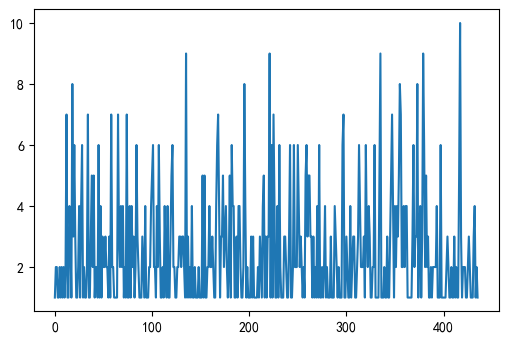

In [65]:
plt.plot(tradesCount)

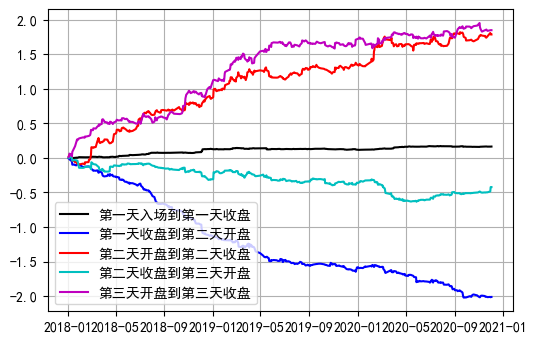

In [66]:
plt.plot(dtes2Label(dtesUsed), np.cumsum(pnl1), 'k')
plt.plot(dtes2Label(dtesUsed), np.cumsum(pnl2), 'b')
plt.plot(dtes2Label(dtesUsed), np.cumsum(pnl3), 'r')
plt.plot(dtes2Label(dtesUsed), np.cumsum(pnl4), 'c')
plt.plot(dtes2Label(dtesUsed), np.cumsum(pnl5), 'm')
plt.legend(['第一天入场到第一天收盘', '第一天收盘到第二天开盘','第二天开盘到第二天收盘','第二天收盘到第三天开盘','第三天开盘到第三天收盘'])
plt.grid()


In [67]:
rschLib.drawPNL(dtesUsed, pnl3+pnl4+pnl5,  dtes, strategy_name, toDatabase='yes')

In [68]:
rschLib.saveOffStart(strategy_name, off_start)